# Loading Data for SYMPOD

This tutorial shows the structure of SYMPOD and how to load the data in a simple way.

## Dataset Structure

The SYMPOD dataset is organized into two main folders: 'Structures' and 'Powder_images'. Within the 'Structures' folder, you will find JSON files that contain information about each crystalline structure. The 'Powder_images' folder, on the other hand, includes PNG files of simulated radial images corresponding to each structure. The organization of these folders and files is illustrated in the image below.


![](Diagrama.jpeg)

Each JSON file features a dictionary that provides details about a specific crystal structure. The keys in the dictionary include 'ID', 'space_group', 'alpha', 'beta', 'gamma', 'a', 'b', 'c', 'atoms', and 'intensities'. It is important to note that the 'ID' key serves as the identifier for both the structure (formatted as 'ID.json') and its associated radial image (formatted as 'ID.png'). The 'space_group' key contains symmetry information as an integer between 1 and 230. The keys 'alpha', 'beta', 'gamma', 'a', 'b', and 'c' represent the cell parameters, while the 'atoms' key contains information about atomic numbers, coordinates, and occupancy. Finally, the 'intensities' key holds the simulated powder diffractogram related to the structure.

## File Download

To use the dataset, first download the 'Data' folder. After that, unzip the 'Structures' and 'Powder_images' folders contained within the 'Data' folder.

**Caution:** When unzipping, additional 'Structures' and 'Powder_images' folders may be created. If this happens, please delete these extra folders to ensure compliance with the file structure outlined in the previous image. Once you have completed this process, you can proceed to load the data.

**Important:** The tutorial file must be located in the same directory as the 'Data' folder.


## Loading of Crystal Structures

First, import the required python libraries.

In [1]:
import os
import glob
import json
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

Let's start by generating a list of the paths associated with all the structures.

In [2]:
structures_paths = glob.glob(os.path.join('Data', 'Structures', '*.json'))
len(structures_paths)

467861

The list contains approximately 500 thousand paths of all crystal structures in the dataset. Let's load a crystal structure to see its content. 

In [3]:
structure_path = structures_paths[0]
file = open(structure_path)
structure = json.load(file)

Let's see the ID, the cell parameters and the space group of this structure.

In [4]:
for i in ['ID', 'space_group', 'a', 'b', 'c', 'alpha', 'beta', 'gamma']:
    print(i+':', structure[i])

ID: 1000000
space_group: 14
a: 7.8783
b: 10.4689
c: 16.068
alpha: 90.0
beta: 95.147
gamma: 90.0


Now let's look at the atoms, their occupancy and their different coordinates.

In [5]:
print(np.array(structure['atoms']))

[[15.       1.       0.55909  0.78402  0.02396]
 [15.       1.       0.09646  1.05563  0.13485]
 [13.       1.       0.24723  0.95928 -0.02995]
 [ 8.       1.       0.1684   0.9724   0.0667 ]
 [ 8.       1.       0.6564   0.7078  -0.0386 ]
 [ 1.       1.       0.7123   0.7571  -0.0649 ]
 [ 8.       1.       0.0882   0.9116  -0.1048 ]
 [ 8.       1.       0.1982   1.1793   0.1459 ]
 [ 8.       1.       0.4005   0.8408  -0.0252 ]
 [ 8.       1.       0.5116   0.6993   0.0927 ]
 [ 8.       1.       0.1067   0.9814   0.2149 ]
 [ 8.       1.       0.6701   0.8956   0.0585 ]
 [ 7.       1.       0.5653   0.4525   0.1464 ]
 [ 1.       1.       0.4934   0.4053   0.1133 ]
 [ 1.       1.       0.5704   0.5309   0.1254 ]
 [ 1.       1.       0.5288   0.4565   0.1972 ]
 [ 6.       1.       0.7372   0.3936   0.1518 ]
 [ 1.       1.       0.784    0.4038   0.0984 ]
 [ 1.       1.       0.7258   0.3028   0.1618 ]
 [ 6.       1.       0.8618   0.4488   0.2194 ]
 [ 1.       1.       0.8225   0.4271   0

We can see that the first column contains the atomic numbers, the second the occupancy and the last three the normalized Cartesian coordinates (X, Y, Z). Finally, let's load the simulated powder diffractogram associated with the structure.

In [6]:
powder_drx = structure['intensities']
len(powder_drx)

10824

This diffractogram contains 10824 intensity points with a $2\theta$ range between 5° and 90°. Let's visualize it.

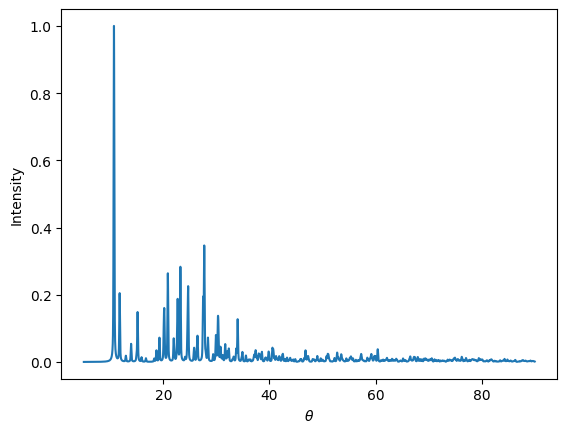

In [7]:
thetas = np.linspace(5, 90, 10824)

plt.figure()
plt.plot(thetas, powder_drx)
plt.xlabel('$\\theta$')
plt.ylabel('Intensity')
plt.show()

## Image Loading

To load an image associated to a structure, you need its ID. Let's see the simulated image associated to the structure we loaded previously.

In [8]:
ID = structure['ID']
image_path = os.path.join('Data', 'Powder_images', ID+'.png')
image = np.array(io.imread(image_path))
print(image.shape)

(521, 521)


The dimension of all the images is 521 x 521. Let's visualize the loaded image.

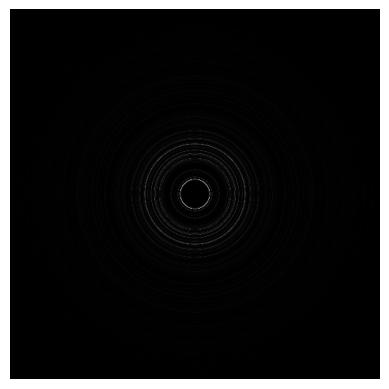

In [9]:
plt.figure()
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.show()

Great! Now you are able to use SYMPOD dataset.

## References

Vaitkus, A., Merkys, A., Sander, T., Quirós, M., Thiessen, P. A., Bolton, E. E. & Gražulis, S. (2023). A workflow for deriving chemical entities from crystallographic data and its application to the Crystallography Open Database. Journal of Cheminformatics, 15(1). https://doi.org/10.1186/s13321-023-00780-2.

Merkys, A.; Vaitkus, A.; Grybauskas, A.; Konovalovas, A.; Quirós, M. & Gražulis, S. "Graph isomorphism-based algorithm for cross-checking chemical and crystallographic descriptions". Journal of Cheminformatics, Springer Nature, 2023, 15.

Vaitkus, A., Merkys, A. & Gražulis, S. (2021). Validation of the Crystallography Open Database using the Crystallographic Information Framework. Journal of Applied Crystallography, 54(2), 661-672. https://doi.org/10.1107/S1600576720016532

Quirós, M.; Gražulis, S.; Girdzijauskaitė, S.; Merkys, A. & Vaitkus, A. "Using SMILES strings for the description of chemical connectivity in the Crystallography Open Database". Journal of Cheminformatics, Springer Nature, 2018, 10

Merkys, A.; Vaitkus, A.; Butkus, J.; Okulič-Kazarinas, M.; Kairys, V. & Gražulis, S. (2016) "COD::CIF::Parser: an error-correcting CIF parser for the Perl language". Journal of Applied Crystallography, 49.

Gražulis, S., Merkys, A., Vaitkus, A. & Okulič-Kazarinas, M. (2015) "Computing stoichiometric molecular composition from crystal structures". Journal of Applied Crystallography 48, 85-91.

Gražulis, S., Daškevič, A., Merkys, A., Chateigner, D., Lutterotti, L., Quirós, M., Serebryanaya, N. R., Moeck, P., Downs, R. T. & LeBail, A. (2012) "Crystallography Open Database (COD): an open-access collection of crystal structures and platform for world-wide collaboration". Nucleic Acids Research 40, D420-D427.

Grazulis, S., Chateigner, D., Downs, R. T., Yokochi, A.  T., Quiros, M., Lutterotti, L., Manakova, E., Butkus, J., Moeck, P. & Le Bail, A. (2009) "Crystallography Open Database - an open-access collection of crystal structures". J. Appl. Cryst. 42, 726-729.

Downs, R. T. & Hall-Wallace, M. (2003) "The American Mineralogist  Crystal Structure Database". American Mineralogist 88, 247-250.

Dan Porter, & Carmelo Prestipino. (2023). DanPorter/Dans_Diffraction: Version 3.0.0 (v3.0). Zenodo. https://doi.org/10.5281/zenodo.8106031

